# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [2]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [3]:
# a) Cálculo da média e diferença dos valores
df['média'] = df.mean(axis = 1)
df['diferença'] = df.p2 - df.p1
df.head().style.format(precision=2, decimal = ',')

,p1,p2,média,diferença
0,"6,96","7,94","7,45","0,98"
1,"2,86","5,10","3,98","2,24"
2,"2,27","0,97","1,62","-1,29"
3,"5,51","4,47","4,99","-1,04"
4,"7,19","8,94","8,07","1,74"


In [4]:
# b) Correlação entre p1 e p2
corr1 = df['p1'].corr(df['p2'])
print(f"Correlação entre p1 e p2: {corr1:.2f}")

Correlação entre p1 e p2: 0.90


In [5]:
# c) Correlação entre média e diferença
corr2 = df['média'].corr(df['diferença'])
print(f"Correlação entre média e diferença: {corr2:.2f}")

Correlação entre média e diferença: 0.13


A relação entre os valores de p1 e p2 é muito maior que a relação entre a média e a diferença destes valores (0,90 >>> 0,13). Isso indica que que as variáveis iniciasi tem uma forte correlação, praticamente linear, o que pode indicar que elas são influênciadas por uma mesma característica. Enquanto a relação entre a média e a diferença é baixa devido a não interferência entre elas, capturando características diferentes das variáveis iniciais. A média calcula o nível geral das variáveis p1 e p2, e a diferença calcula a discrepância entre elas. A baixa correlação sugere que as variáveis derivadas podem ser usadas para análise, pois não são redundantes.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [6]:
df['soma'] = df.p2 + df.p1
df.head().style.format(precision=2, decimal = ',')

,p1,p2,média,diferença,soma
0,"6,96","7,94","7,45","0,98","14,91"
1,"2,86","5,10","3,98","2,24","7,96"
2,"2,27","0,97","1,62","-1,29","3,24"
3,"5,51","4,47","4,99","-1,04","9,99"
4,"7,19","8,94","8,07","1,74","16,13"


In [7]:
# Correlação entre média e diferença
corr3 = df['soma'].corr(df['diferença'])
print(f"Correlação entre média e diferença: {corr3:.2f}")

Correlação entre média e diferença: 0.13


In [10]:
def translin_v2(m):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -df.p1.min()*1.5
    xmax = df.p1.max()*1.5
    ymin = -df.p1.min()*1.5
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')
    x = np.linspace(xmin, xmax, 100)
    y = x
    ax.plot(x, y, linewidth=.5, linestyle='--', color = 'r')
    plt.text(11, 10.5, r'$y = x$')

    plt.scatter(x = df.p1, y=df.p2, label = 'originais', c = 'g')
    plt.scatter(x = df['média'], y=df['diferença'], label = 'média x diferença', c = 'm')
    plt.scatter(x = df['soma'], y=df['diferença'], label = 'soma x diferença', c = 'c')

    ax.legend(loc='upper left')

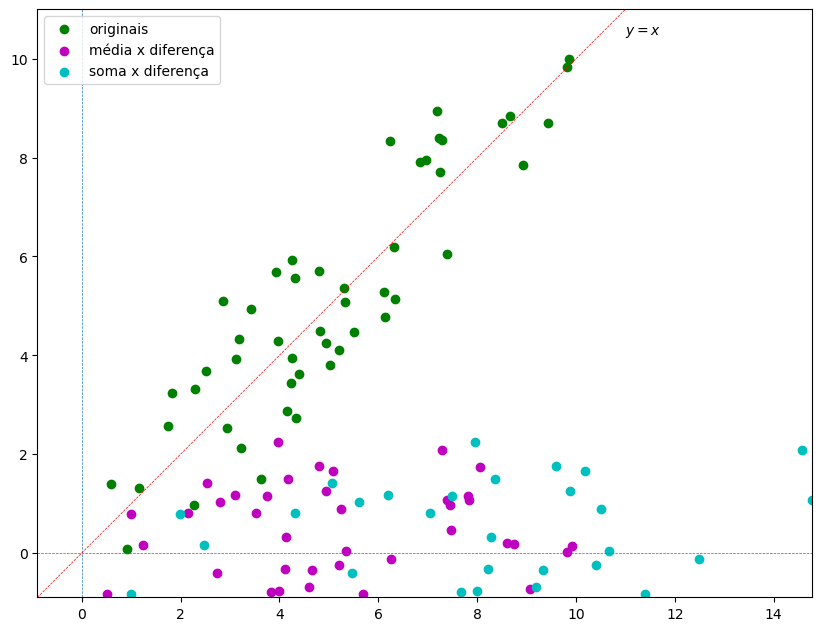

In [11]:
translin_v2(df)

Observando o gráfico apresentado nota-se que entre p1 e p2 há uma forte relação crescente e praticamente linear, convergindo para a reta y = x plotada. 
Já sobre as relações entre os gráficos de relação entre as variáveis calculadas notamos um desenho semelhante entre elas, estando ambas muito próximas da reta y = 0. Essa caracterítica já era esperada uma vez que ambas as correlações calculadas anteriormente tem os mesmos valores 0.13.